In [5]:
from check_env import run_env_check
run_env_check()

ModuleNotFoundError: No module named 'check_env'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [7]:
! pip install scikit-learn

In [8]:
! pip install matplotlib

In [9]:
mushroom_obs_df = pd.read_csv('mushrom_observations.csv', delimiter = ';')
mushroom_obs_df.head()
len(mushroom_obs_df)

61069

In [10]:
mushroom = pd.read_csv('mushroom_characteristics.csv', delimiter = ';')
mushroom.head()
len(mushroom)

173

In [11]:
cap_shape = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'}
cap_surface = {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy'}
cap_color = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'}
bruise_bleed = {'t': 'bruises-or-bleeding', 'f': 'no'}
gill_attachment = {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'}
gill_spacing = {'c': 'close', 'd': 'distant', 'f': 'none'}
stem_root = {'b': 'bulbous', 's': 'swollen', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'}
veil_type = {'p': 'partial', 'u': 'universal'}
has_ring = {'t': 'ring', 'f': 'none'}
ring_type = {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved', 'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone', 'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'}
habitat = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
season = {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}

# Map variable names to their dictionaries (for quick lookup)
code_maps = {
    'cap-shape': cap_shape,
    'cap-surface': cap_surface,
    'cap-color': cap_color,
    'does-bruise-bleed': bruise_bleed,
    'gill-attachment': gill_attachment,
    'gill-spacing': gill_spacing,
    'stem-root': stem_root,
    'veil-type': veil_type,
    'has-ring': has_ring,
    'ring-type': ring_type,
    'spore-print-color': cap_color,  # same as cap-color
    'habitat': habitat,
    'season': season
}

def decode_mushroom_row(row):
    """
    Given a dict of mushroom data with letter codes, return a new dict with codes replaced by words.
    Assumes metrical variables (floats) are unchanged.
    """
    decoded = {}
    for var, val in row.items():
        if var in code_maps:
            # If value is '?' or unknown, handle gracefully
            if val in code_maps[var]:
                decoded[var] = code_maps[var][val]
            else:
                decoded[var] = val  # Keep original if code not found
        else:
            # metrical or unknown variables stay the same
            decoded[var] = val
    return decoded

In [12]:
sample_row = {
    'cap-shape': 'x',          # convex
    'cap-surface': 's',        # smooth
    'cap-color': 'n',          # brown
    'does-bruise-bleed': 't', # bruises-or-bleeding
    'gill-attachment': 'f',    # none
    'gill-spacing': 'c',       # close
    'stem-root': 'b',          # bulbous
    'veil-type': 'p',          # partial
    'has-ring': 't',           # ring
    'ring-type': 'c',          # cobwebby
    'spore-print-color': 'w',  # white
    'habitat': 'd',            # woods
    'season': 'a',             # autumn
    'weight': 150              # numerical, stays the same
}

decoded = decode_mushroom_row(sample_row)
print(decoded)

{'cap-shape': 'convex', 'cap-surface': 'smooth', 'cap-color': 'brown', 'does-bruise-bleed': 'bruises-or-bleeding', 'gill-attachment': 'none', 'gill-spacing': 'close', 'stem-root': 'bulbous', 'veil-type': 'partial', 'has-ring': 'ring', 'ring-type': 'cobwebby', 'spore-print-color': 'white', 'habitat': 'woods', 'season': 'autumn', 'weight': 150}


In [13]:
mushroom_obs_df.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [14]:
mushroom.head()


,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,"season,,,,,,,,,,,,,,,"
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w],,,,,,"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a],,,,,,,,,,"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a],,,,,,,,"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a],,,,,,,,,,"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a],,,,,,,,,"


In [15]:
mushroom.isnull().sum().sum()


np.int64(871)

In [16]:
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

In [17]:
# To see if there is any null values in the dataset
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   family                 173 non-null    object
 1   name                   173 non-null    object
 2   class                  173 non-null    object
 3   cap-diameter           173 non-null    object
 4   cap-shape              173 non-null    object
 5   Cap-surface            133 non-null    object
 6   cap-color              173 non-null    object
 7   does-bruise-or-bleed   173 non-null    object
 8   gill-attachment        145 non-null    object
 9   gill-spacing           102 non-null    object
 10  gill-color             173 non-null    object
 11  stem-height            173 non-null    object
 12  stem-width             173 non-null    object
 13  stem-root              27 non-null     object
 14  stem-surface           65 non-null     object
 15  stem-color             

In [18]:
#To find number of rows and column
mushroom.shape

(173, 23)

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3926283867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=mushroom, palette=('#9b111e','#50c878'))


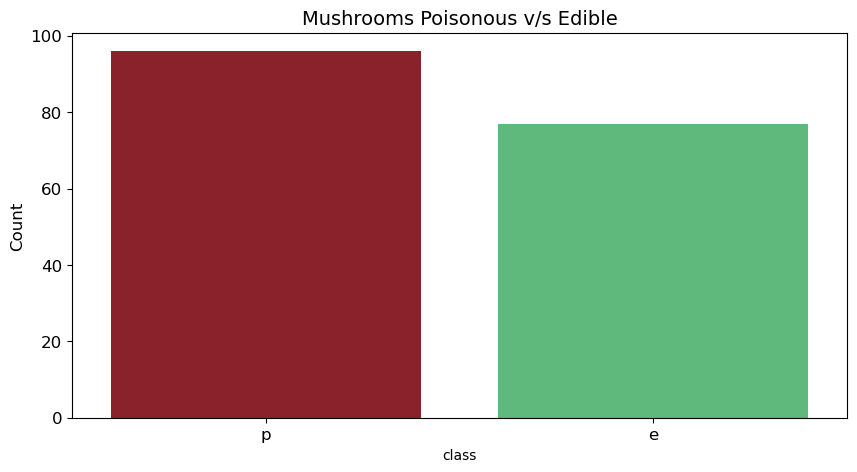

In [19]:
plt.figure(figsize=(10,5))
plt.title('Mushrooms Poisonous v/s Edible', fontsize=14)
sns.countplot(x="class", data=mushroom, palette=('#9b111e','#50c878'))
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\13830728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=mushroom_obs_df, palette=('#9b111e','#50c878'))


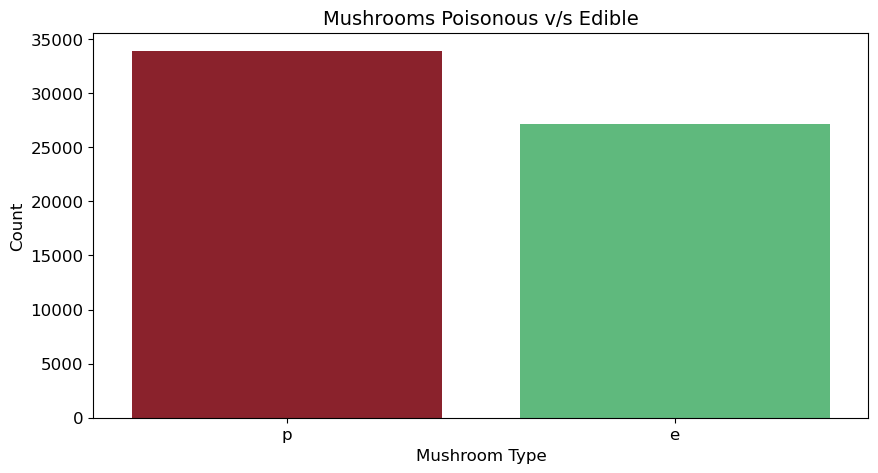

In [20]:
plt.figure(figsize=(10,5))
plt.title('Mushrooms Poisonous v/s Edible', fontsize=14)
sns.countplot(x="class", data=mushroom_obs_df, palette=('#9b111e','#50c878'))
plt.xlabel("Mushroom Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
X = mushroom.drop(['class'],axis=1)
y = mushroom['class']

In [24]:
X = pd.get_dummies(X)
X.head()

,family_Amanita Family,family_Bolbitius Family,family_Bolete Family,family_Bracket Fungi,family_Chanterelle Family,family_Cortinarius Family,family_Crepidotus Family,family_Ear-Pick Family,family_Entoloma Family,family_Hydnum Family,...,"season,,,,,,,,,,,,,,,_[u, a]","season,,,,,,,,,,,,,,,_[u, a],,","season,,,,,,,,,,,,,,,_[u, a],,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,,,,,","season,,,,,,,,,,,,,,,_[u, a],,,,,,,,,,,","season,,,,,,,,,,,,,,,_[u],,,,,,,,,,"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
mushroom.duplicated().sum()

np.int64(0)

In [26]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   family                 173 non-null    object
 1   name                   173 non-null    object
 2   class                  173 non-null    object
 3   cap-diameter           173 non-null    object
 4   cap-shape              173 non-null    object
 5   Cap-surface            133 non-null    object
 6   cap-color              173 non-null    object
 7   does-bruise-or-bleed   173 non-null    object
 8   gill-attachment        145 non-null    object
 9   gill-spacing           102 non-null    object
 10  gill-color             173 non-null    object
 11  stem-height            173 non-null    object
 12  stem-width             173 non-null    object
 13  stem-root              27 non-null     object
 14  stem-surface           65 non-null     object
 15  stem-color             

In [27]:
mushroom['class'].value_counts().to_frame()

,count
class,
p,96
e,77


In [28]:
mushroom_obs_df['class'].value_counts().to_frame()

,count
class,
p,33888
e,27181


In [29]:
mushroom_obs_df.groupby(['cap-shape'])['class'].value_counts().to_frame()

count
cap-shape class       
b         p       4436
          e       1258
c         p       1041
          e        774
f         p       6902
          e       6502
o         p       2635
          e        825
p         e       1567
          p       1031
s         p       3869
          e       3295
x         p      13974
          e      12960

In [30]:
mushroom.groupby(['cap-shape'])['class'].value_counts().to_frame()

count
cap-shape class       
[b, f, s] p          1
[b, f]    p          3
          e          2
[b, x, f] p          1
[b, x]    p          3
[b]       p          8
          e          2
[c, f]    p          2
[c, x, f] e          1
[c, x]    e          1
[c]       p          2
          e          1
[f, s]    p          5
          e          3
[f, x]    e          1
          p          1
[f]       e          4
          p          4
[o]       p          7
          e          1
[p, b]    p          2
          e          1
[p, c, o] e          1
[p, f]    e          2
[p, x, f] e          2
[p, x]    e          3
          p          1
[p]       p          1
[s, o]    e          2
[s]       p          5
          e          4
[x, f, s] e          7
          p          6
[x, f]    p         15
          e         14
[x, o]    p          1
[x, p]    e          1
          p          1
[x, s]    p          2
          e          1
[x]       p         25
          e         23

In [31]:
mushroom_obs_df.groupby(['cap-shape'])['class'].value_counts().to_frame()

count
cap-shape class       
b         p       4436
          e       1258
c         p       1041
          e        774
f         p       6902
          e       6502
o         p       2635
          e        825
p         e       1567
          p       1031
s         p       3869
          e       3295
x         p      13974
          e      12960

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3673238360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['cap-shape'], ax=axarr[0], order=mushroom['cap-shape'].value_counts().index, palette="magma").set_title('Cap Shape Distribution')


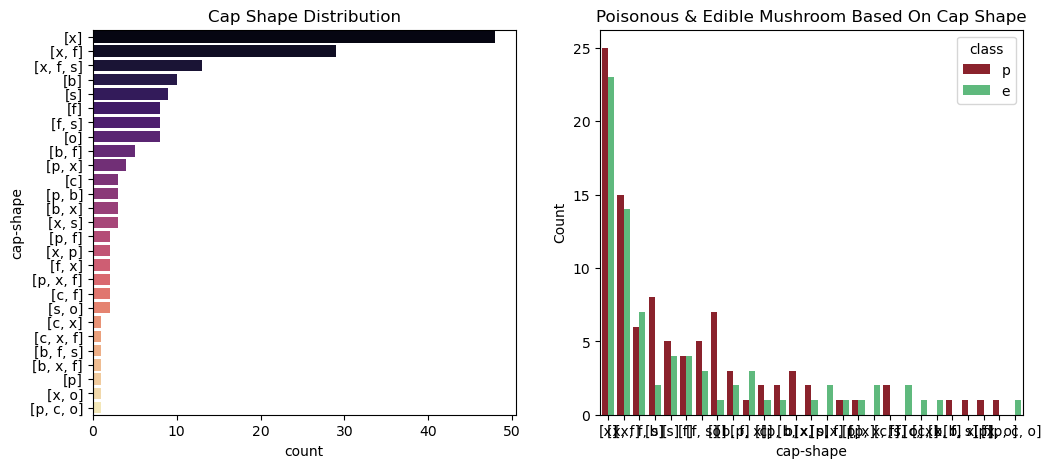

In [32]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['cap-shape'], ax=axarr[0], order=mushroom['cap-shape'].value_counts().index, palette="magma").set_title('Cap Shape Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Shape')
b = sns.countplot(x="cap-shape", data=mushroom, hue="class", palette=('#9b111e','#50c878'), order=mushroom['cap-shape'].value_counts().index, ax=axarr[1]).set_ylabel('Count')

In [33]:
mushroom.groupby(['Cap-surface'])['class'].value_counts().to_frame()

count
Cap-surface  class       
[d, e, y, i] p          1
[d, k, s]    p          1
[d, k]       e          1
             p          1
[d, s]       e          1
[d]          p          5
             e          4
[e, k, s, h] p          1
[e, t, k]    p          1
[e, y]       e          1
[e]          e          3
             p          2
[g, h]       p          1
[g, s, d]    p          1
[g, s, h, t] e          1
[g, s, t]    e          1
[g]          p          7
             e          5
[h, s, d]    e          1
[h, s, t]    p          1
[h, t, w]    p          1
[h, t, y]    p          1
[h, t]       e          6
             p          4
[h]          e          3
             p          2
[i, e]       p          1
[i, y]       e          2
[i]          p          4
[k, e]       p          1
[k]          p          4
[l]          e          2
             p          2
[s, d]       e          1
[s, h]       p          1
[s, i]       p          1
[s, t]       e          2
             p          2
[s, y]       p          2
             e          1
[s]          e          8
             p          5
[t, h, s]    e          1
[t, h]       e          1
             p          1
[t, w, d]    p          1
[t]          p         10
             e          2
[w, t]       e          1
[w]          p          3
             e          2
[y, s]       e          1
[y]          e          7
             p          7

In [34]:
mushroom_obs_df.groupby(['cap-surface'])['class'].value_counts().to_frame()

count
cap-surface class       
d           p       2383
            e       2049
e           p       1348
            e       1236
g           p       2760
            e       1964
h           e       2617
            p       2357
i           p       1856
            e        369
k           p       2122
            e        181
l           e        706
            p        706
s           e       4338
            p       3270
t           p       5373
            e       2823
w           p       1288
            e        862
y           e       3329
            p       3012

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3624422647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['cap-shape'], ax=axarr[0], order=mushroom_obs_df['cap-shape'].value_counts().index, palette="magma").set_title('Cap Shape Distribution')


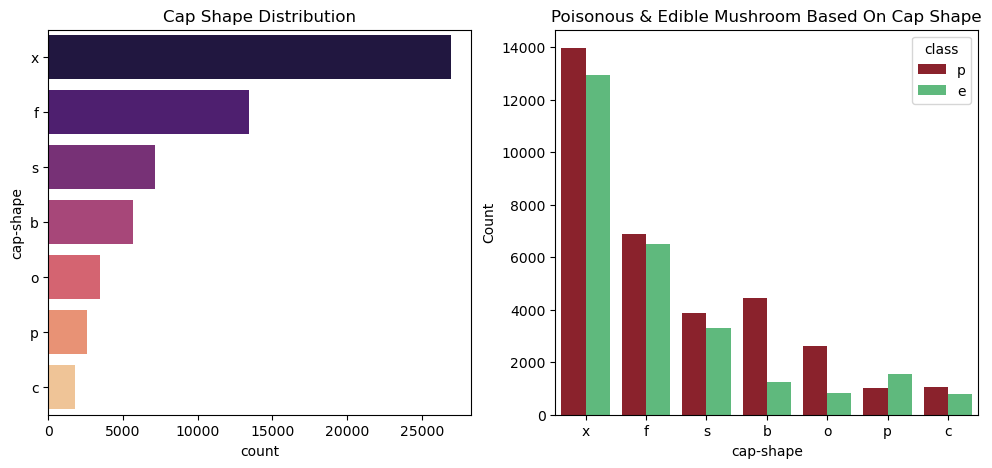

In [35]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['cap-shape'], ax=axarr[0], order=mushroom_obs_df['cap-shape'].value_counts().index, palette="magma").set_title('Cap Shape Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Shape')
b = sns.countplot(x="cap-shape", data=mushroom_obs_df, hue="class", palette=('#9b111e','#50c878'), order=mushroom_obs_df['cap-shape'].value_counts().index, ax=axarr[1]).set_ylabel('Count')

In [36]:
mushroom_obs_df.groupby(['cap-surface'])['class'].value_counts().to_frame()

count
cap-surface class       
d           p       2383
            e       2049
e           p       1348
            e       1236
g           p       2760
            e       1964
h           e       2617
            p       2357
i           p       1856
            e        369
k           p       2122
            e        181
l           e        706
            p        706
s           e       4338
            p       3270
t           p       5373
            e       2823
w           p       1288
            e        862
y           e       3329
            p       3012

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3339643913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['Cap-surface'], ax=axarr[0], order=mushroom['Cap-surface'].value_counts().index, palette="magma").set_title('Cap Surface Distribution')


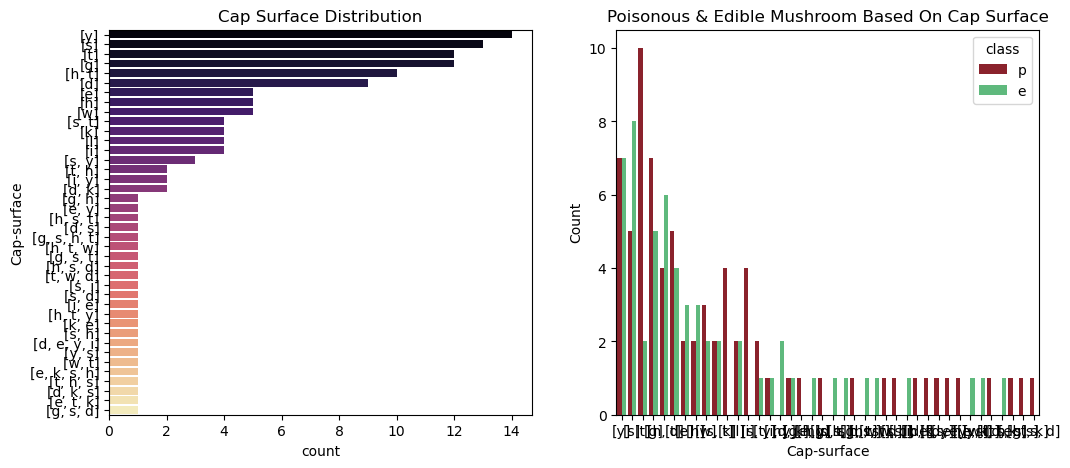

In [37]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['Cap-surface'], ax=axarr[0], order=mushroom['Cap-surface'].value_counts().index, palette="magma").set_title('Cap Surface Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Surface')
b = sns.countplot(x="Cap-surface", data=mushroom, hue="class", order=mushroom['Cap-surface'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')


In [39]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['cap-surface'], ax=axarr[0], order=mushroom

_IncompleteInputError: incomplete input (1934583573.py, line 2)

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\2484582540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['cap-surface'], ax=axarr[0], order=mushroom_obs_df['cap-surface'].value_counts().index, palette="magma").set_title('Cap Surface Distribution')


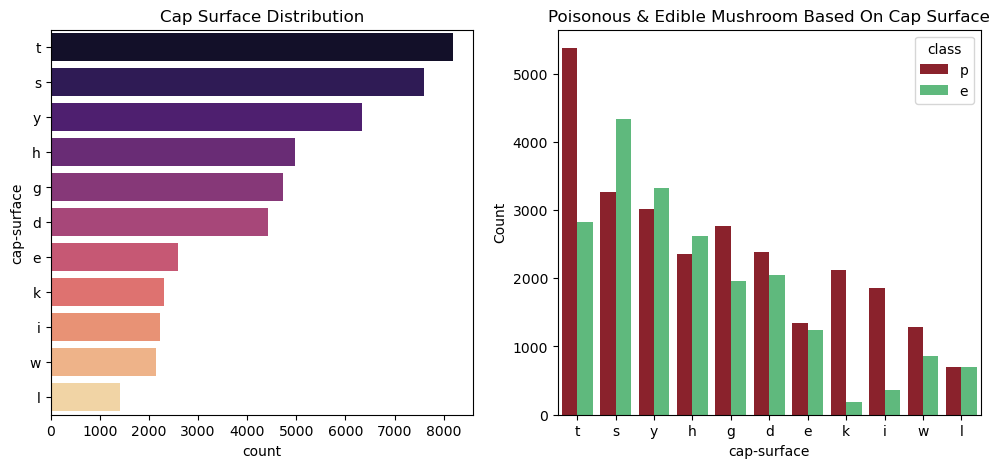

In [40]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['cap-surface'], ax=axarr[0], order=mushroom_obs_df['cap-surface'].value_counts().index, palette="magma").set_title('Cap Surface Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Surface')
b = sns.countplot(x="cap-surface", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['cap-surface'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

In [41]:
mushroom.groupby(['cap-color'])['class'].value_counts().to_frame()

,,count
cap-color,class,
"[b, p, e, y]",p,1
"[b, u]",e,1
[b],e,1
"[e, n, p, w]",p,1
"[e, n, y]",e,2
...,...,...
"[y, o, g, n, r]",p,1
"[y, o, r, n]",p,1
"[y, o]",p,1


In [42]:
mushroom_obs_df.groupby(['cap-color'])['class'].value_counts().to_frame()

count
cap-color class       
b         e        974
          p        256
e         p       3155
          e        880
g         e       2297
          p       2123
k         p        778
          e        501
l         e        452
          p        376
n         e      12407
          p      11811
o         p       2585
          e       1071
p         p       1254
          e        449
r         p       1584
          e        198
u         p       1098
          e        611
w         p       3916
          e       3750
y         p       4952
          e       3591

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\600454810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['cap-color'], ax=axarr[0], order=mushroom['cap-color'].value_counts().index, palette="magma").set_title('Cap Color Distribution')


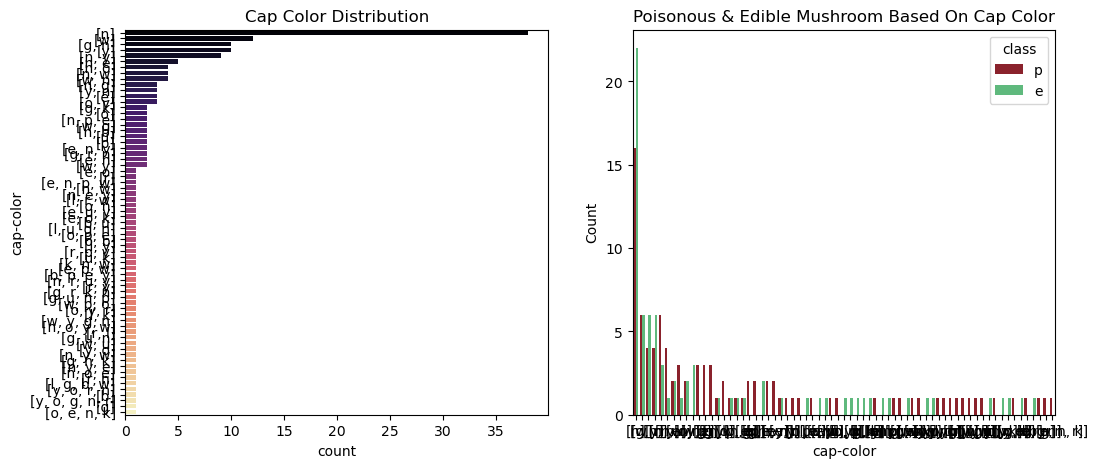

In [43]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['cap-color'], ax=axarr[0], order=mushroom['cap-color'].value_counts().index, palette="magma").set_title('Cap Color Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Color')
b = sns.countplot(x="cap-color", data=mushroom, hue="class", order=mushroom['cap-color'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')


C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\2021338042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['cap-color'], ax=axarr[0], order=mushroom_obs_df['cap-color'].value_counts().index, palette="magma").set_title('Cap Color Distribution')


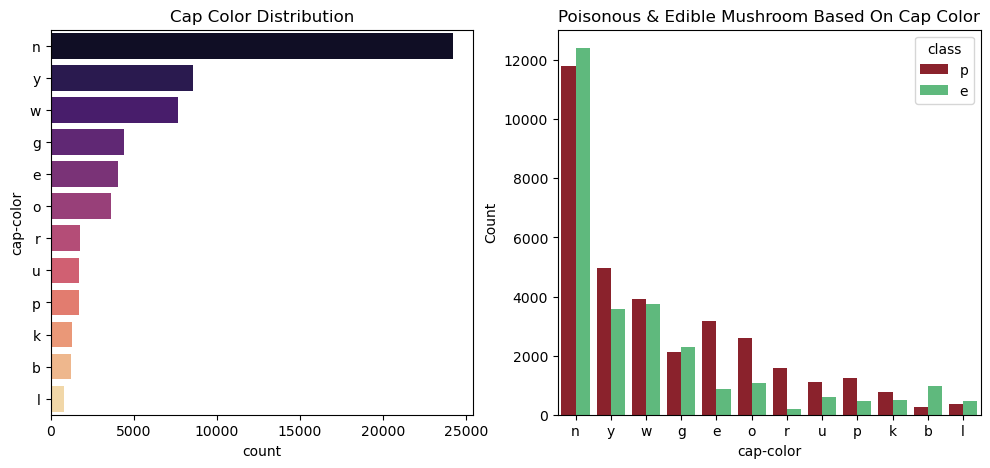

In [44]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['cap-color'], ax=axarr[0], order=mushroom_obs_df['cap-color'].value_counts().index, palette="magma").set_title('Cap Color Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Cap Color')
b = sns.countplot(x="cap-color", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['cap-color'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')


In [45]:
mushroom.groupby(['does-bruise-or-bleed'])['class'].value_counts().to_frame()

count
does-bruise-or-bleed class       
[f]                  p         80
                     e         63
[t]                  p         16
                     e         14

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\1167958750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['does-bruise-or-bleed'], ax=axarr[0], order=mushroom['does-bruise-or-bleed'].value_counts().index, palette="magma").set_title('Bruise Distribution')


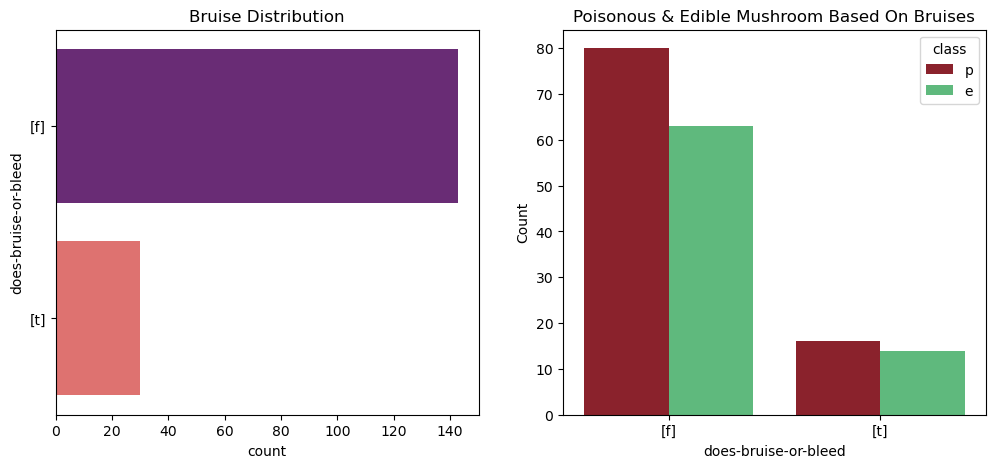

In [46]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['does-bruise-or-bleed'], ax=axarr[0], order=mushroom['does-bruise-or-bleed'].value_counts().index, palette="magma").set_title('Bruise Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Bruises')
b = sns.countplot(x="does-bruise-or-bleed", data=mushroom, hue="class", order=mushroom['does-bruise-or-bleed'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\1825303538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['does-bruise-or-bleed'], ax=axarr[0], order=mushroom_obs_df['does-bruise-or-bleed'].value_counts().index, palette="magma").set_title('Bruise Distribution')


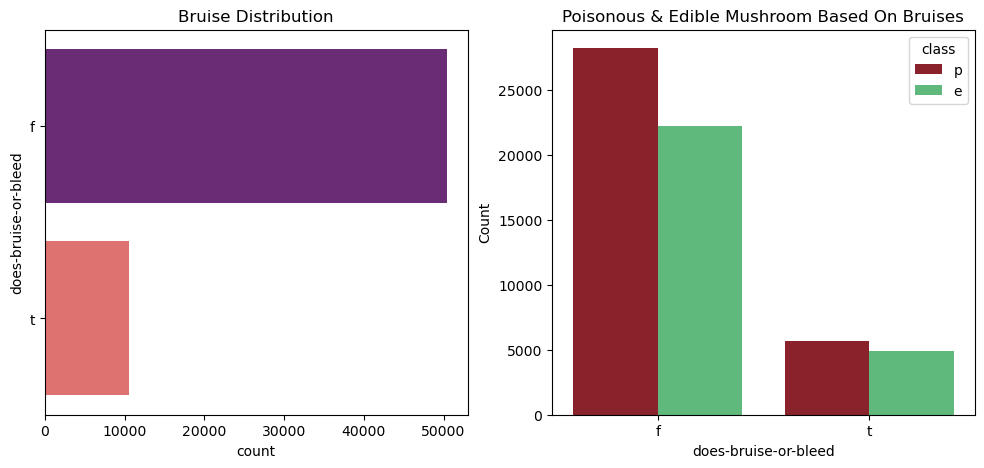

In [47]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['does-bruise-or-bleed'], ax=axarr[0], order=mushroom_obs_df['does-bruise-or-bleed'].value_counts().index, palette="magma").set_title('Bruise Distribution')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Bruises')
b = sns.countplot(x="does-bruise-or-bleed", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['does-bruise-or-bleed'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

In [48]:
mushroom.groupby(['gill-attachment'])['class'].value_counts().to_frame()

count
gill-attachment class       
[a, d]          e          5
                p          3
[a]             p         21
                e         11
[d]             p         16
                e          9
[e]             e         10
                p          6
[f]             p          6
                e          4
[p]             e         12
                p          5
[s]             p          9
                e          7
[x]             p         12
                e          9

In [49]:
mushroom_obs_df.groupby(['gill-attachment'])['class'].value_counts().to_frame()

count
gill-attachment class       
a               p       7953
                e       4745
d               p       6167
                e       4080
e               e       3530
                p       2118
f               p       2118
                e       1412
p               e       4236
                p       1765
s               p       3177
                e       2471
x               p       4236
                e       3177

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\1643437774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['gill-attachment'], ax=axarr[0], order=mushroom['gill-attachment'].value_counts().index, palette="magma").set_title('Gill Attachment')


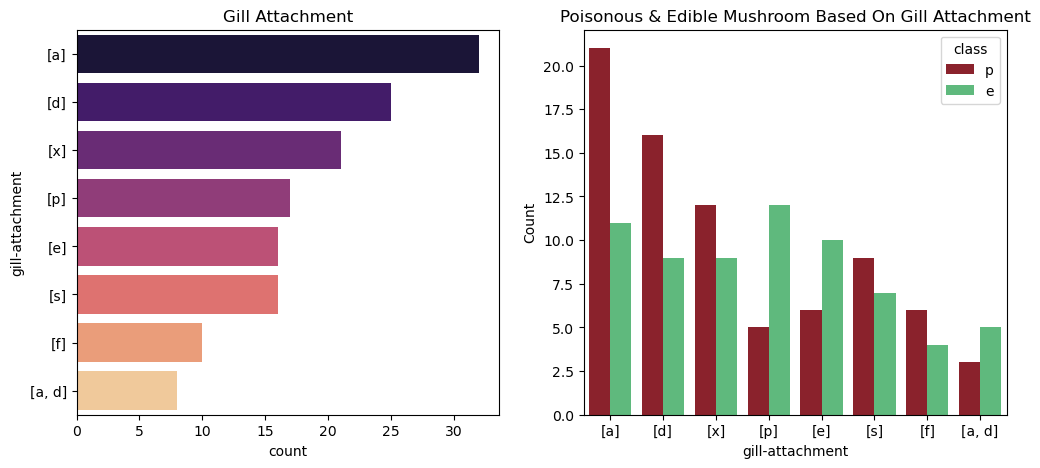

In [50]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['gill-attachment'], ax=axarr[0], order=mushroom['gill-attachment'].value_counts().index, palette="magma").set_title('Gill Attachment')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Gill Attachment')
b = sns.countplot(x="gill-attachment", data=mushroom, hue="class", order=mushroom['gill-attachment'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\332022698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['gill-attachment'], ax=axarr[0], order=mushroom_obs_df['gill-attachment'].value_counts().index, palette="magma").set_title('Gill Attachment')


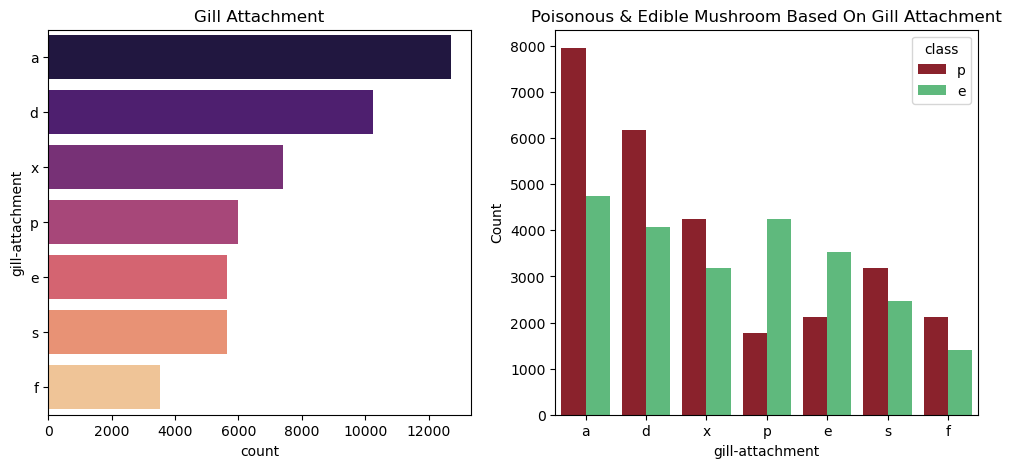

In [51]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['gill-attachment'], ax=axarr[0], order=mushroom_obs_df['gill-attachment'].value_counts().index, palette="magma").set_title('Gill Attachment')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Gill Attachment')
b = sns.countplot(x="gill-attachment", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['gill-attachment'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

In [52]:
mushroom.groupby(['gill-spacing'])['class'].value_counts().to_frame()

count
gill-spacing class       
[c]          p         41
             e         29
[d]          e         13
             p          9
[f]          p          6
             e          4

In [53]:
mushroom_obs_df.groupby(['gill-spacing'])['class'].value_counts().to_frame()

count
gill-spacing class       
c            p      14473
             e      10237
d            e       4589
             p       3177
f            p       2118
             e       1412

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\288971129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['gill-spacing'], ax=axarr[0], order=mushroom['gill-spacing'].value_counts().index, palette="magma").set_title('Gill Spacing')


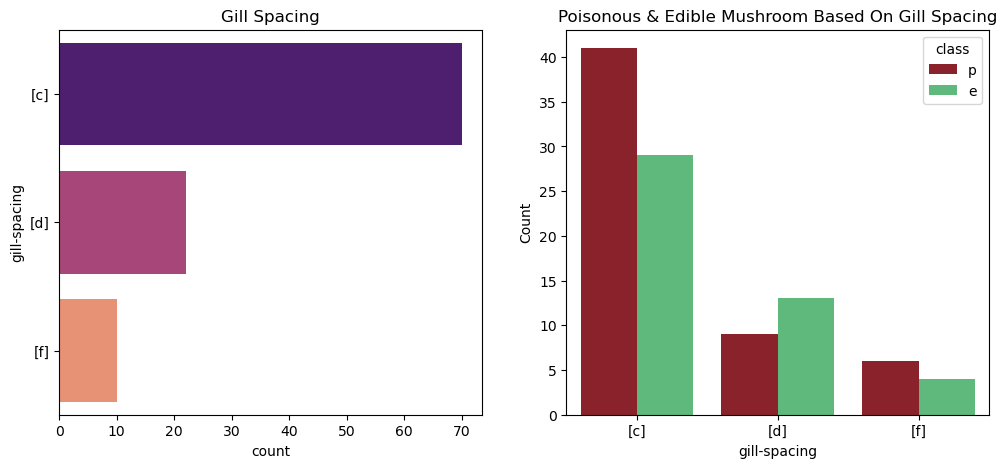

In [54]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['gill-spacing'], ax=axarr[0], order=mushroom['gill-spacing'].value_counts().index, palette="magma").set_title('Gill Spacing')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Gill Spacing')
b = sns.countplot(x="gill-spacing", data=mushroom, hue="class", order=mushroom['gill-spacing'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3394828865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['gill-spacing'], ax=axarr[0], order=mushroom_obs_df['gill-spacing'].value_counts().index, palette="magma").set_title('Gill Spacing')


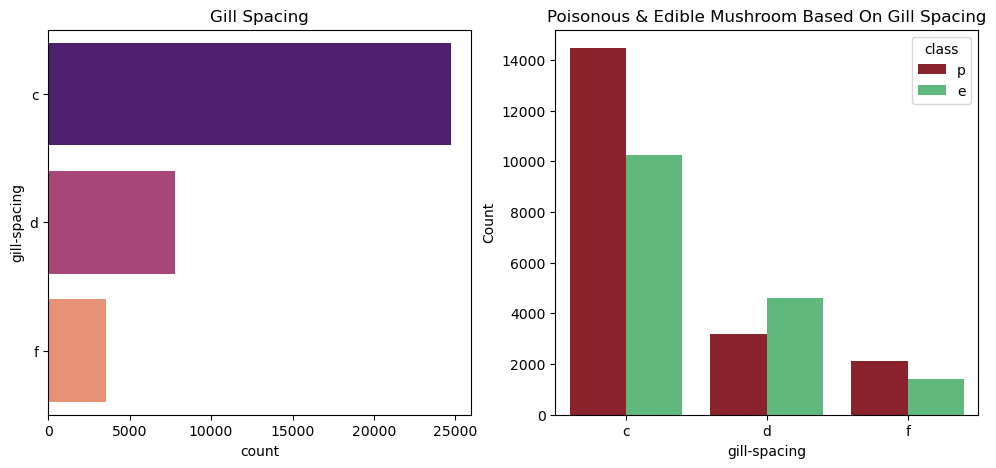

In [55]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['gill-spacing'], ax=axarr[0], order=mushroom_obs_df['gill-spacing'].value_counts().index, palette="magma").set_title('Gill Spacing')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Gill Spacing')
b = sns.countplot(x="gill-spacing", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['gill-spacing'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

In [56]:
mushroom.groupby(['stem-height'])['class'].value_counts().to_frame()

,,count
stem-height,class,
[0],p,3
"[1, 2]",p,1
"[1, 3]",p,1
"[10, 12]",p,2
"[10, 15]",e,1
...,...,...
"[8, 12]",p,1
"[8, 15]",e,1
"[8, 20]",p,1


In [57]:
mushroom_obs_df.groupby(['stem-height'])['class'].value_counts().to_frame()

,,count
stem-height,class,
0.00,p,1059
0.97,p,1
1.09,p,1
1.10,p,1
1.12,p,2
...,...,...
32.85,e,1
33.03,e,1
33.25,e,1


In [58]:
mushroom.groupby(['habitat'])['class'].value_counts().to_frame()

count
habitat      class       
[d, h]       p          3
             e          1
[d]          p         57
             e         47
[g, d, h]    e          1
[g, d]       e          6
             p          4
[g, h, d]    p          2
             e          1
[g, l, d]    p          1
[g, l, m, d] e          1
[g, m, d]    p          4
             e          1
[g, m]       e          3
             p          2
[g, u, d]    e          1
[g]          p         10
             e          1
[h, d]       p          2
[l, d, h]    e          1
[l, d]       e          7
             p          6
[l, h]       e          1
[l]          e          1
[m, d]       e          2
             p          1
[m, h]       p          1
[m]          e          1
             p          1
[p, d]       p          2
[w]          e          1

In [59]:
mushroom_obs_df.groupby(['habitat'])['class'].value_counts().to_frame()

count
habitat class       
d       p      24046
        e      20163
g       p       5454
        e       2489
h       p       1305
        e        696
l       e       1938
        p       1230
m       p       1493
        e       1427
p       p        360
u       e        115
w       e        353

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3492478354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom['habitat'], ax=axarr[0], order=mushroom['habitat'].value_counts().index, palette="magma").set_title('Habitat')


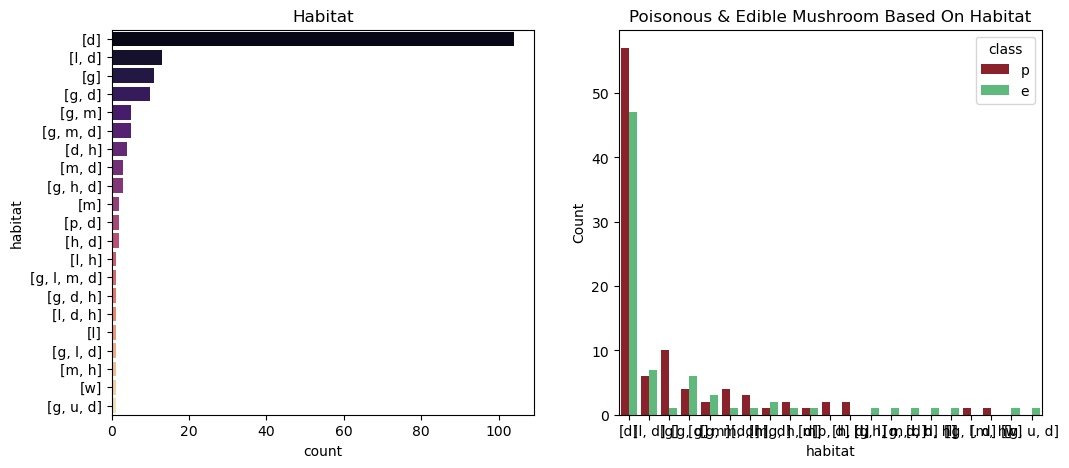

In [60]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom['habitat'], ax=axarr[0], order=mushroom['habitat'].value_counts().index, palette="magma").set_title('Habitat')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Habitat')
b = sns.countplot(x="habitat", data=mushroom, hue="class", order=mushroom['habitat'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\1683701762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(mushroom_obs_df['habitat'], ax=axarr[0], order=mushroom_obs_df['habitat'].value_counts().index, palette="magma").set_title('Habitat')


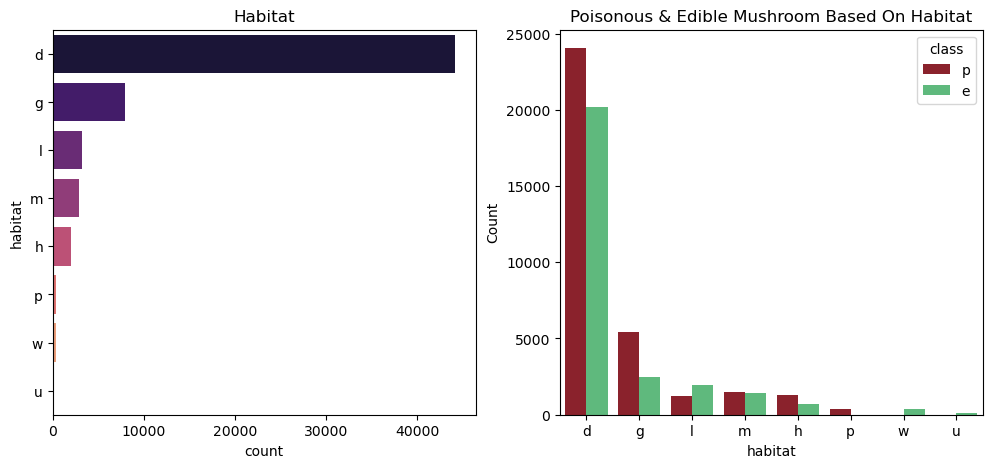

In [61]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(mushroom_obs_df['habitat'], ax=axarr[0], order=mushroom_obs_df['habitat'].value_counts().index, palette="magma").set_title('Habitat')
axarr[1].set_title('Poisonous & Edible Mushroom Based On Habitat')
b = sns.countplot(x="habitat", data=mushroom_obs_df, hue="class", order=mushroom_obs_df['habitat'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

In [62]:
mushroom_obs_df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

In [63]:
mushroom_obs_df.nunique().sort_values()

veil-type                  1
class                      2
does-bruise-or-bleed       2
has-ring                   2
gill-spacing               3
season                     4
stem-root                  5
veil-color                 6
gill-attachment            7
spore-print-color          7
cap-shape                  7
stem-surface               8
ring-type                  8
habitat                    8
cap-surface               11
gill-color                12
cap-color                 12
stem-color                13
stem-height             2226
cap-diameter            2571
stem-width              4630
dtype: int64

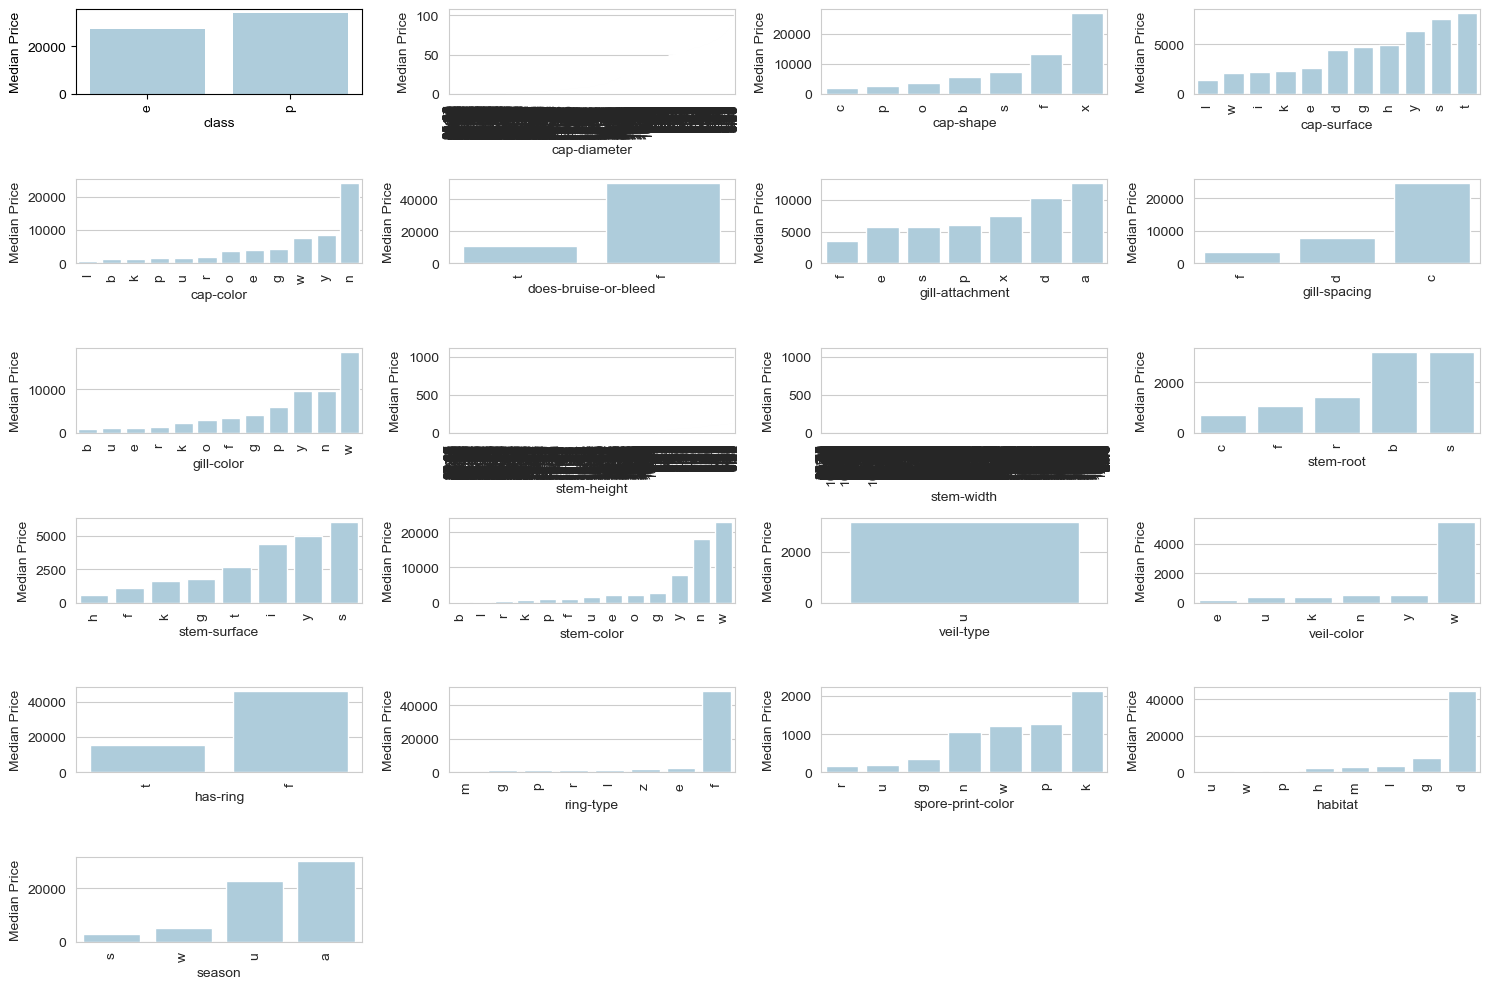

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, col in enumerate(mushroom_obs_df.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = mushroom_obs_df, ax = ax, 
        order = mushroom_obs_df[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_colors = 2571  # number of distinct colors needed

# Generate colors by sampling a continuous colormap (e.g., 'hsv' or 'viridis')
colors = plt.cm.hsv(np.linspace(0, 1, num_colors))

# Convert to list of colors
palette = [colors[i] for i in range(num_colors)]

plt.figure(figsize=(15,10))
for i, col in enumerate(mushroom_obs_df.columns):
    ax = plt.subplot(6,4,i+1)
    
    # Get unique categories in this column
    unique_vals = mushroom_obs_df[col].value_counts(ascending=True).index
    
    # Create a dictionary mapping each category to a distinct color
    # Limit to max colors available if categories > num_colors
    cat_colors = {k: palette[j % num_colors] for j, k in enumerate(unique_vals)}
    
    # Use the color list in order of categories
    sns.countplot(
        x=col, data=mushroom_obs_df, ax=ax,
        order=unique_vals,
        palette=[cat_colors[val] for val in unique_vals]
    )
    
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()

plt.show()

C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3808024557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\kayleigh1888\AppData\Local\Temp\ipykernel_2052\3808024557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


In [ ]:
mushroom_df.dropna(axis=1, inplace=True)

print("stalk-root" in mushroom_df.columns)

In [ ]:
from sklearn.feature_selection import chi2, RFECV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve, plot_roc_curve